In [1]:

from dataset import KittiVLOdomDataset
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from kiss_icp.metrics import absolute_trajectory_error

In [2]:
dataset = KittiVLOdomDataset("data/SemanticKITTI/dataset", sequences_to_load=["00"])

In [3]:
real_poses = [np.array([0, 0, 0])]
real_orients = [np.identity(3)]
kiss_poses = [np.array([0, 0, 0])]
kiss_orients = [np.identity(3)]

In [4]:
tf_gt = [np.identity(4)]
tf_kiss = [np.identity(4)]

In [ ]:
for idx in range(len(dataset)):
    kiss = dataset.seqs_info["00"]["diff_kiss_poses"][idx]
    gt = dataset.seqs_info["00"]["diff_gt_poses"][idx]

    r_diff_real = R.from_quat(gt[3:]).as_matrix()
    t_diff_real = gt[:3]
    real_orients.append(r_diff_real @ real_orients[-1])
    real_poses.append((r_diff_real @ real_poses[-1]) + t_diff_real)

    r_diff_kiss = R.from_quat(kiss[3:]).as_matrix()
    t_diff_kiss = kiss[:3]
    kiss_orients.append(r_diff_kiss @ kiss_orients[-1])
    kiss_poses.append((r_diff_kiss @ kiss_poses[-1]) + t_diff_kiss)

    tf_gt.append(
        np.vstack(
            [
                np.hstack(
                    [real_orients[-1].copy(), real_poses[-1].reshape((3, 1)).copy()]
                ),
                np.array([[0, 0, 0, 1]]),
            ]
        )
    )
    tf_kiss.append(
        np.vstack(
            [
                np.hstack(
                    [kiss_orients[-1].copy(), kiss_poses[-1].reshape((3, 1)).copy()]
                ),
                np.array([[0, 0, 0, 1]]),
            ]
        )
    )

kiss_poses = np.array(kiss_poses)
real_poses = np.array(real_poses)
tf_gt = np.array(tf_gt)
tf_kiss = np.array(tf_kiss)

In [6]:
tf_kiss.shape, tf_gt.shape

((4541, 4, 4), (4541, 4, 4))

In [7]:
absolute_trajectory_error(tf_gt, tf_kiss)

(0.018581602722406387, 3.5007214546203613)

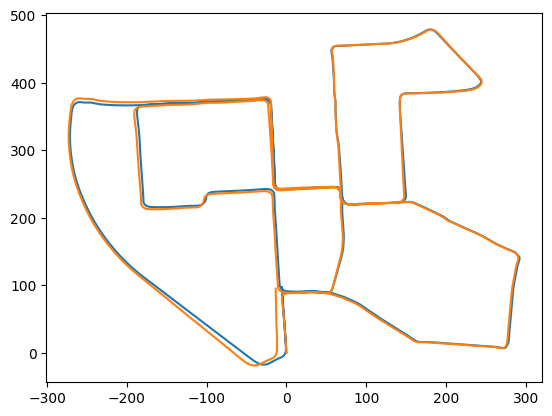

In [8]:
plt.plot(real_poses[:,0], real_poses[:,2])
plt.plot(kiss_poses[:,0], kiss_poses[:,2])
